# Time-series Momentum Strategy

The time-series momentum strategy is a trend following strategy that invests in assets that have had high returns in the past and shorts assets that have had low returns in the past. Here's how we can implement this strategy:

1. **Select the universe of assets**: We need to decide which assets we're going to consider for our portfolio. This could be a set of stocks, commodities, ETFs, etc.

2. **Calculate the momentum**: For each asset in our universe, we calculate the momentum. This is typically done by looking at the past returns over a certain period. For example, we could calculate the 12-month return of each asset, skipping the most recent month.

3. **Rank the assets based on momentum**: We rank the assets from highest momentum to lowest momentum. The assets with the highest momentum are the ones we're interested in buying, and the ones with the lowest momentum are the ones we're interested in shorting.

4. **Form a portfolio based on the rankings**: We form a long-short portfolio by buying the assets with the highest momentum and shorting the assets with the lowest momentum. The number of assets we buy and short can be a fixed number (e.g., we always buy the top 5 assets and short the bottom 5 assets), or it can be a function of the momentum (e.g., we buy all assets with momentum greater than a certain threshold, and short all assets with momentum less than a certain threshold).

5. **Rebalance the portfolio periodically**: The momentum of assets changes over time, so we need to periodically (e.g., once a month) repeat the steps above to calculate the new momentums, rank the assets, and rebalance the portfolio.

This strategy is called 'time-series' momentum because it only looks at the time-series of each asset's price (i.e., it only looks at the past returns of each asset, not the returns of other assets). This is in contrast to 'cross-sectional' momentum strategies, which rank assets based on their momentum relative to each other.

[                       0%                       ]

[**********            20%                       ]  2 of 10 completed

[*******************   40%                       ]  4 of 10 completed

[*******************   40%                       ]  4 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************60%****                   ]  6 of 10 completed

[**********************80%*************          ]  8 of 10 completed

[**********************90%******************     ]  9 of 10 completed

[*********************100%***********************]  10 of 10 completed

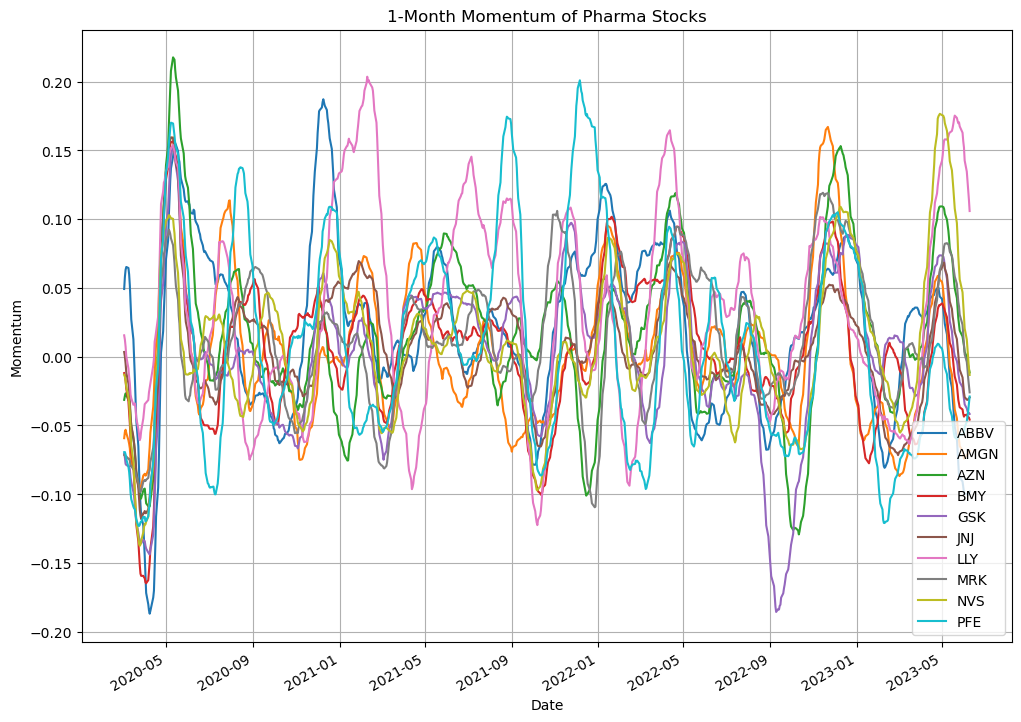

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the tickers of the pharma stocks we're interested in
tickers = ['PFE', 'JNJ', 'GSK', 'NVS', 'ABBV', 'MRK', 'AMGN', 'BMY', 'LLY', 'AZN']

# Download the historical data
data = yf.download(tickers, start='2020-01-01', end='2023-06-10')['Adj Close']

# Calculate the 1-month returns
returns = data.pct_change(21)

# Define the momentum calculation period (in trading days)
momentum_period = 21

# Calculate the momentum
momentum = returns.rolling(momentum_period).mean()

# Plot the momentum
momentum.plot(figsize=(12, 9))
plt.title('1-Month Momentum of Pharma Stocks')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.legend()
plt.grid()
plt.show()

The plot above shows the 1-month momentum of various pharma stocks. As you can see, the momentum varies over time for each stock, reflecting the changing trends in their prices.

Now, let's implement the time-series momentum strategy. Here's how we can do it:

1. **Calculate the momentum**: We've already done this in the previous step.

2. **Form a portfolio based on the momentum**: We form a long-short portfolio by buying the stocks with positive momentum and shorting the stocks with negative momentum. In this case, we'll simply go long on the stocks with positive momentum and avoid the ones with negative momentum, since shorting may not be feasible for all investors.

3. **Rebalance the portfolio periodically**: The momentum of stocks changes over time, so we need to periodically (e.g., once a month) repeat the steps above to calculate the new momentums and rebalance the portfolio.

Let's implement this in the next code cell.

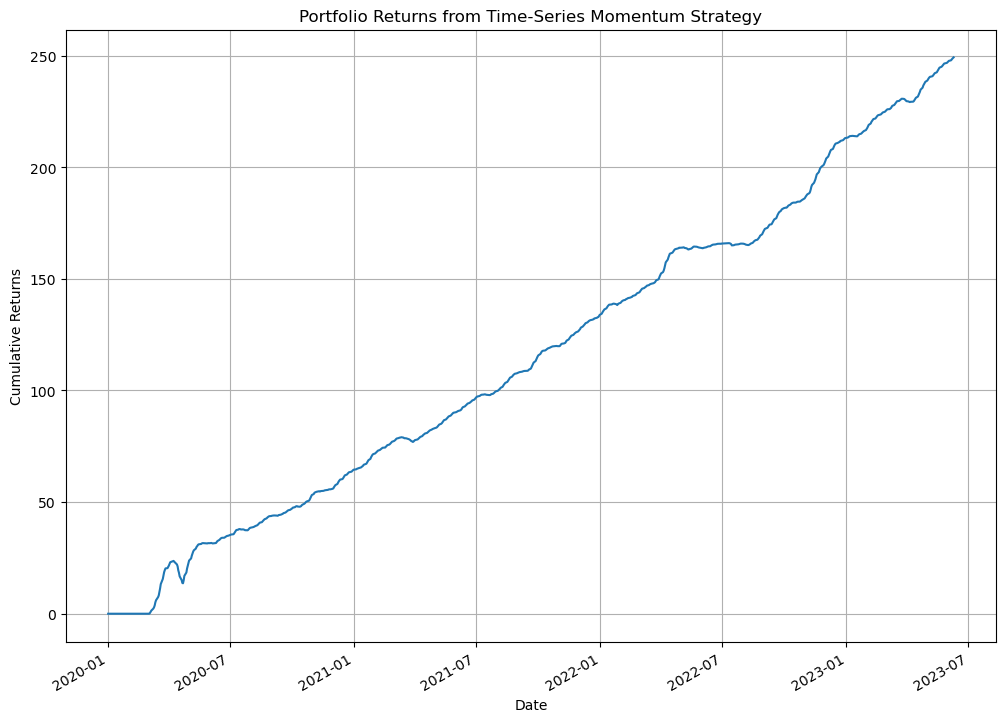

In [ ]:
# Define the momentum threshold (we'll go long on stocks with momentum greater than this threshold)
momentum_threshold = 0.01

# Create a DataFrame to hold our portfolio positions
portfolio = pd.DataFrame(index=momentum.index, columns=momentum.columns)

# Set the portfolio positions: 1 for long, 0 for no position
portfolio[momentum > momentum_threshold] = 1
portfolio[momentum <= momentum_threshold] = -1

# Calculate the portfolio returns
portfolio_returns = (portfolio.shift() * returns).sum(axis=1)

# Plot the portfolio returns
portfolio_returns.cumsum().plot(figsize=(12, 9))
plt.title('Portfolio Returns from Time-Series Momentum Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

The plot above shows the cumulative returns of the time-series momentum strategy applied to the selected pharma stocks. As you can see, the strategy has periods of gains and losses, reflecting the changing trends in the stocks' prices.

Now, let's compare this with the cross-sectional momentum strategy. For the cross-sectional momentum strategy, we'll rank the stocks based on their momentum and go long on the top-ranked stocks and short the bottom-ranked stocks. Let's implement this in the next code cell.

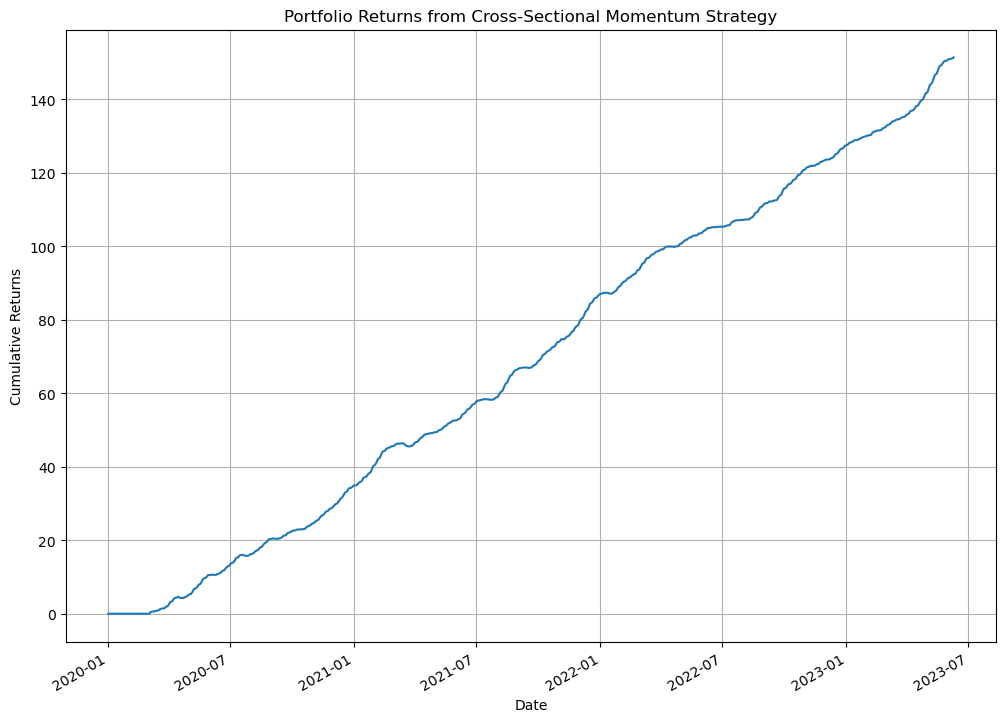

In [ ]:
# Rank the stocks based on their momentum
ranks = momentum.rank(axis=1)

# Define the number of stocks to go long and short
n_long = 3
n_short = 3

# Create a DataFrame to hold our portfolio positions
portfolio_cross_section = pd.DataFrame(index=momentum.index, columns=momentum.columns)

# Set the portfolio positions: 1 for long, -1 for short, 0 for no position
portfolio_cross_section[ranks >= n_long] = 1
portfolio_cross_section[ranks < (len(tickers) - n_short)] = -1
portfolio_cross_section[(ranks > n_long) & (ranks <= (len(tickers) - n_short))] = 0

# Calculate the portfolio returns
portfolio_returns_cross_section = (portfolio_cross_section.shift() * returns).sum(axis=1)

# Plot the portfolio returns
portfolio_returns_cross_section.cumsum().plot(figsize=(12, 9))
plt.title('Portfolio Returns from Cross-Sectional Momentum Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

The plot above shows the cumulative returns of the cross-sectional momentum strategy applied to the selected pharma stocks. As you can see, the strategy has periods of gains and losses, reflecting the changing trends in the stocks' prices and their relative performance.

Now, let's compare the performance of the time-series momentum strategy and the cross-sectional momentum strategy. We'll do this by plotting the cumulative returns of both strategies on the same plot.

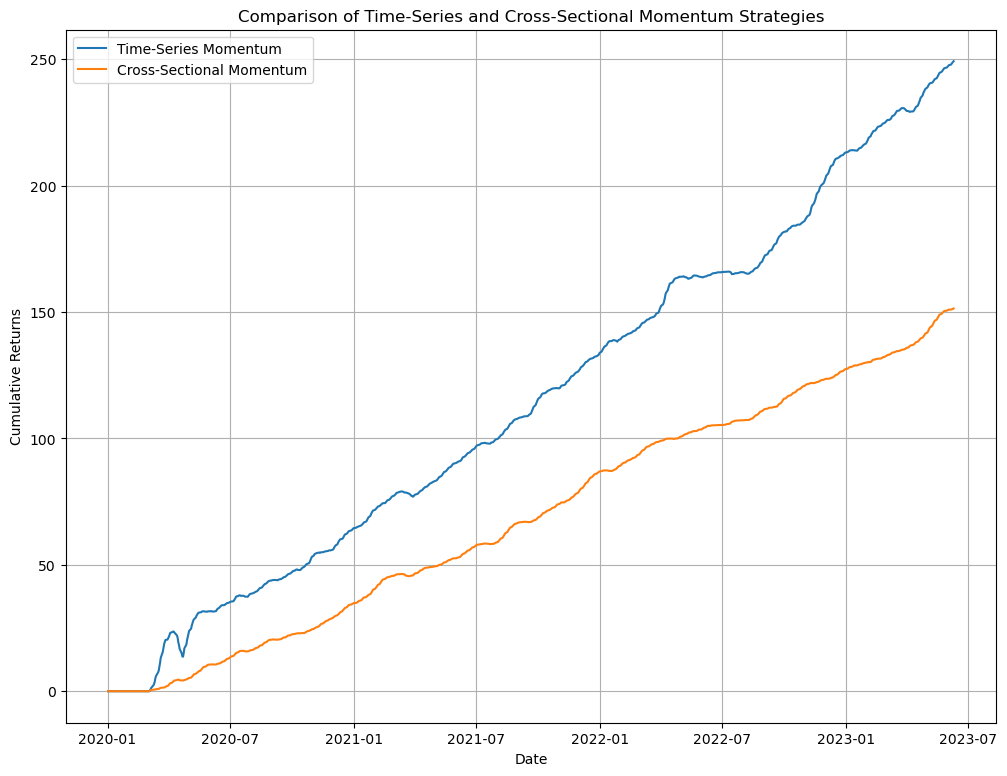

In [ ]:
# Plot the cumulative returns of both strategies
plt.figure(figsize=(12, 9))
plt.plot(portfolio_returns.cumsum(), label='Time-Series Momentum')
plt.plot(portfolio_returns_cross_section.cumsum(), label='Cross-Sectional Momentum')
plt.title('Comparison of Time-Series and Cross-Sectional Momentum Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()